In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.cluster import KMeans
from six.moves import cPickle as pickle

In [2]:
def clusterDistanceInfo(C1,C2,k1,k2): #np array length n each element label
        matrixk = np.zeros((k1,k2))
        vector1 = np.zeros(k1)
        vector2 = np.zeros(k2)
        n = C1.shape[0]
        for el1,el2 in zip(C1,C2):
            vector1[int(el1)] += 1.
            vector2[int(el2)] += 1.
            matrixk[int(el1),int(el2)] += 1.
        vector1 *= 1/n
        vector2 *= 1/n
        matrixk *= 1/n
        print(-(vector1*np.log(vector1)).sum())
        print(- (vector2*np.log(vector2)).sum())
        print(- 2*(matrixk * ((np.ma.log(((matrixk/vector1[:,None])/vector2[None,:]))).filled(0))).sum())
        return -(vector1*np.log(vector1)).sum() - (vector2*np.log(vector2)).sum() - 2*(matrixk * ((np.ma.log(((matrixk/vector1[:,None])/vector2[None,:]))).filled(0))).sum()

In [3]:
def load_preprocessing(filename_):
    with open(filename_, 'rb') as f:
        ret_di = pickle.load(f)
    return ret_di

In [109]:
data_path = './data/'
data_name = 'classic-emd_tr_te_splitdict70.pkl'


data = load_preprocessing(data_path + data_name)

In [110]:
print(data['topics'].shape)

(70, 5813)


[1 1 0 1 1 0 0 1 1 1 2 2 2 1 1 0 1 1 1 2]


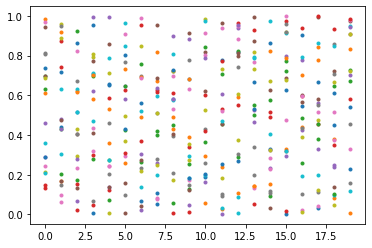

In [75]:
data = np.random.random((20,20))
plt.plot(data,'.')
result = KMeans(n_clusters=3,n_init = 25, max_iter = 25).fit(data).labels_
print(result)

In [91]:
C1 = np.array([0,1,2,0,1,2])
C2 = np.array([0,0,1,1,2,2])
clusterDistanceInfo(np.array(C1),np.array(C2),3,3)

1.0986122886681096
1.0986122886681096
-0.8109302162163285


1.3862943611198906

In [94]:
-2*np.log(3/2)

-0.8109302162163288

In [65]:
A1 = np.load("data/ArrayDistExp0.npy")

In [89]:
A2 = np.load("data/ArrayDistInfoExp1.npy")

In [67]:
A3 = np.load("data/ArrayPvalExp0.npy")

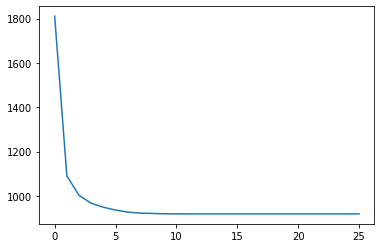

In [68]:
plt.plot(A1)

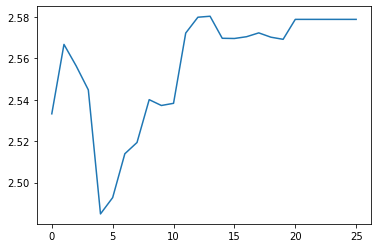

In [90]:
plt.plot(A2)

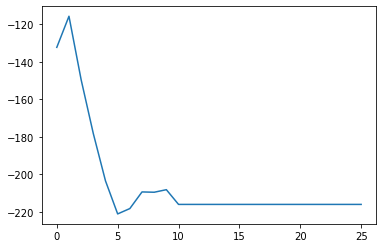

In [70]:
plt.plot(np.log(A3))

In [22]:
m = open("data/bbc/bbc.classes","r")

In [19]:
m=np.array(m)

In [25]:
print(m.readlines())

['%%Clustering hard\n', '%Name NaturalClasses\n', '%Clusters 5 business,entertainment,politics,sport,tech\n', '%Objects\n', '0 0\n', '1 0\n', '2 0\n', '3 0\n', '4 0\n', '5 0\n', '6 0\n', '7 0\n', '8 0\n', '9 0\n', '10 0\n', '11 0\n', '12 0\n', '13 0\n', '14 0\n', '15 0\n', '16 0\n', '17 0\n', '18 0\n', '19 0\n', '20 0\n', '21 0\n', '22 0\n', '23 0\n', '24 0\n', '25 0\n', '26 0\n', '27 0\n', '28 0\n', '29 0\n', '30 0\n', '31 0\n', '32 0\n', '33 0\n', '34 0\n', '35 0\n', '36 0\n', '37 0\n', '38 0\n', '39 0\n', '40 0\n', '41 0\n', '42 0\n', '43 0\n', '44 0\n', '45 0\n', '46 0\n', '47 0\n', '48 0\n', '49 0\n', '50 0\n', '51 0\n', '52 0\n', '53 0\n', '54 0\n', '55 0\n', '56 0\n', '57 0\n', '58 0\n', '59 0\n', '60 0\n', '61 0\n', '62 0\n', '63 0\n', '64 0\n', '65 0\n', '66 0\n', '67 0\n', '68 0\n', '69 0\n', '70 0\n', '71 0\n', '72 0\n', '73 0\n', '74 0\n', '75 0\n', '76 0\n', '77 0\n', '78 0\n', '79 0\n', '80 0\n', '81 0\n', '82 0\n', '83 0\n', '84 0\n', '85 0\n', '86 0\n', '87 0\n', '88 0\

In [4]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from data import loader, load_preprocessing
from knn_classifier import knn

import distances
import hott
from kcluster import kclustering
import numpy as np
import kcluster
import importlib
importlib.reload(kcluster)# Download datasets used by Kusner et al from

<module 'kcluster' from 'D:\\Desktop\\CoursMVA\\ComputationalOptTransport\\Project\\HOTT\\kcluster.py'>

In [16]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from data import loader, load_preprocessing
from knn_classifier import knn

import distances
import hott
from kcluster import kclustering
import numpy as np
import kcluster
import importlib
importlib.reload(kcluster)# Download datasets used by Kusner et al from
# https://www.dropbox.com/sh/nf532hddgdt68ix/AABGLUiPRyXv6UL2YAcHmAFqa?dl=0
# and put them into
data_path = './data/'

# Download GloVe 6B tokens, 300d word embeddings from
# https://nlp.stanford.edu/projects/glove/
# and put them into
embeddings_path = './data/glove.6B/glove.6B.300d.txt'

# Pick a dataset (uncomment the line you want)
data_name = 'ohsumed-emd_tr_te_ixdict10.pkl'
data_matrix = 'ohsumed-emd_tr_te_ix.mat'
data_name = 'amazon-emd_tr_te_splitdict4.pkl'
# data_name = 'r8-emd_tr_te3.mat'
# data_name = 'amazon-emd_tr_te_split.mat'
# data_name = 'classic-emd_tr_te_split.mat'
# data_name = 'ohsumed-emd_tr_te_ix.mat'


# Pick a seed
# 0-4 for bbcsport, twitter, amazon, classic
# r8 and ohsumed have a pre-defined train/test splits - just set seed=0
data = load_preprocessing(data_path + data_name)
p = 1
C = data['cost_T']
Data = data['X']
y = data['y']
k = np.unique(y).shape[0]

In [17]:
Data.shape

(8000, 16753)

In [18]:
k

4

In [17]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from data import loader, load_preprocessing
from knn_classifier import knn

import distances
import hott
from kcluster import kclustering
import numpy as np
import kcluster
import importlib
importlib.reload(kcluster)# Download datasets used by Kusner et al from
# https://www.dropbox.com/sh/nf532hddgdt68ix/AABGLUiPRyXv6UL2YAcHmAFqa?dl=0
# and put them into
data_path = './data/'

# Download GloVe 6B tokens, 300d word embeddings from
# https://nlp.stanford.edu/projects/glove/
# and put them into
embeddings_path = './data/glove.6B/glove.6B.300d.txt'

# Pick a dataset (uncomment the line you want)
data_name = 'ohsumed-emd_tr_te_ixdict10.pkl'
data_matrix = 'ohsumed-emd_tr_te_ix.mat'
data_name = 'twitter-emd_tr_te_splitdict70.pkl'
# data_name = 'r8-emd_tr_te3.mat'
# data_name = 'amazon-emd_tr_te_split.mat'
# data_name = 'classic-emd_tr_te_split.mat'
# data_name = 'ohsumed-emd_tr_te_ix.mat'


# Pick a seed
# 0-4 for bbcsport, twitter, amazon, classic
# r8 and ohsumed have a pre-defined train/test splits - just set seed=0
data = load_preprocessing(data_path + data_name)
p = 1
C = data['cost_T']
Data = data['X']
y = data['y']
k = np.unique(y).shape[0]

## Cluster tf:
print("Processing tf-clustering")
labels, distInfoFinal, distPvalue = kcluster.kclustertf(k,Data,y)


print("DistInfo :", distInfoFinal)
print("Dist P-Value:", distPvalue)
print("labels", labels)
print("Processing LDA")

k_Lda = k
p = 1
data_lda = loader(data_path + data_matrix, embeddings_path, p=p, K_lda = k)
C_lda = data_lda['cost_T']
Data_lda = data_lda['proportions']
y_lda = data_lda['y']
labels, distInfoFinal, distPvalue = kcluster.kclusterLDA(k,Data_lda,y_lda)
print("DistInfo :", distInfoFinal)
print("Dist P-Value:", distPvalue)
print("labels", labels)

Processing tf-clustering
DistInfo : 1.1748774781608124
Dist P-Value: 7.181061498652231e-305
labels [3 3 2 2 3 2 3 3 3 2 3 3 3 3 2 2 2 3 2 3 2 2 2 3 3 2 2 2 2 3 2 2 2 2 2 2 2
 3 2 3 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 3 3 3 3 3 2 3 3 2 2 2 3 3 2 3 3 3
 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 2 2 3 2 2 3 3 2 2 3 2 4 4 4 4 4 4 4 4 4 4
 4 3 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 3 4 4 4 4 4
 3 3 4 0 1 1 1 3 3 0 1 1 0 0 0 0 0 0 1 1 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3
 1 1 3 3 3 3 3 3 1 0 0 1 1 1 1 0 3 0 0 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 0 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 3 1 1 1 3 1 1 1 1 2 1 2 1
 2 3 1 1 1 1 1 3 1 3 3 0 3 1 3 1 0 1 3 3 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 3 1 1 1 1 0 1 1 1 1 1 1 3 1 1 1 3 3 1 0 3 1 3 1 1 1 1 0 0 1 3 1 1 1 1 3
 3 0 1 1 1 1 0 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 3 0 1 1 1 3 3
 

KeyboardInterrupt: 

Processing wassertein


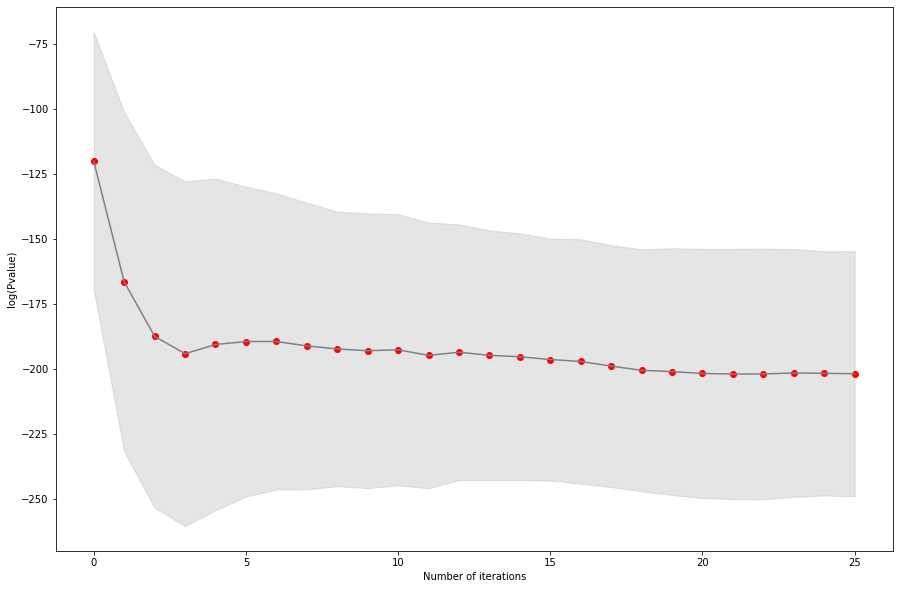

In [16]:
nameWasse = "bbcsportCluster/"
nameDist = "ArrayDistExp"
nameInfo = "ArrayDistInfoExp"
namePvalue = "ArrayPvalExp"
print("Processing wassertein")


# https://www.dropbox.com/sh/nf532hddgdt68ix/AABGLUiPRyXv6UL2YAcHmAFqa?dl=0
# and put them into
data_path = './data/'

# Download GloVe 6B tokens, 300d word embeddings from
# https://nlp.stanford.edu/projects/glove/
# and put them into
embeddings_path = './data/glove.6B/glove.6B.300d.txt'

# Pick a dataset (uncomment the line you want)
data_name = 'bbcsport-emd_tr_te_splitdict5.pkl'
data_matrix = 'bbcsport-emd_tr_te_split.mat'
#data_name = 'twitter-emd_tr_te_splitdict70.pkl'
# data_name = 'r8-emd_tr_te3.mat'
# data_name = 'amazon-emd_tr_te_split.mat'
# data_name = 'classic-emd_tr_te_split.mat'
# data_name = 'ohsumed-emd_tr_te_ix.mat'

arrDist = np.zeros((25,26))
arrDistInfo = np.zeros((25,26))
arrPval = np.zeros((25,26))

for i in range(25):
    arrDist[i] = np.load(data_path + nameWasse + nameDist + str(i) + ".npy")
    arrDistInfo[i] = np.load(data_path + nameWasse + nameInfo + str(i) + ".npy")
    arrPval[i] = np.load(data_path + nameWasse + namePvalue + str(i) + ".npy")

arrDistStd = np.std(arrDist, axis = 0)
arrDistMean = np.mean(arrDist, axis = 0)
arrDistInfoStd = np.std(arrDistInfo, axis = 0)
arrDistInfoMean = np.mean(arrDistInfo, axis = 0)
arrDistPStd = np.std(np.log(arrPval), axis = 0)
arrDistPMean = np.mean(np.log(arrPval), axis = 0)

plt.figure(figsize=(15,10))
#plt.subplot(3, 1, 1)
"""
plt.plot(range(26), arrDistMean, 'or')
plt.plot(range(26), arrDistMean, '-', color='gray')
plt.fill_between(range(26), arrDistMean - arrDistStd, arrDistMean + arrDistStd, color='gray', alpha=0.2)
plt.xlabel("Number of iterations")
plt.ylabel("Distance to Barycenters")
plt.savefig('bbcsportdist.png', dpi=1200)
"""
"""
plt.subplot(3, 1, 2)
plt.plot(range(26), arrDistInfoMean, 'or')
plt.plot(range(26), arrDistInfoMean, '-', color='gray')
plt.fill_between(range(26), arrDistInfoMean - arrDistInfoStd, arrDistInfoMean + arrDistInfoStd, color='gray', alpha=0.2)
"""

#plt.subplot(3, 1, 3)
plt.plot(range(26), arrDistPMean, 'or')
plt.plot(range(26), arrDistPMean, '-', color='gray')
plt.fill_between(range(26), arrDistPMean - arrDistPStd, arrDistPMean + arrDistPStd, color='gray', alpha=0.2)
plt.xlabel("Number of iterations")
plt.ylabel("log(Pvalue)")
plt.savefig('bbcsportdistP.png', dpi=1200)

In [6]:
for i in range(25):
    arrDist[i] = np.load(data_path + nameWasse + nameDist + str(i) + ".npy")
    arrDistInfo[i] = np.load(data_path + nameWasse + nameInfo + str(i) + ".npy")
    arrPval[i] = np.load(data_path + nameWasse + namePvalue + str(i) + ".npy")
    print(arrDist[i])

[1850.19094285 1086.58465628 1030.33550594 1003.2143278   972.15662263
  946.46677164  932.65846772  913.64382207  906.94839393  906.51201556
  906.4474359   906.08557851  907.49881477  906.51579023  904.9468217
  903.27119694  898.4814998   891.95757196  886.2437745   885.7953603
  884.16270043  882.87693676  882.95539619  883.14394652  882.56979926
  882.40918242]
[1969.69912973 1069.29246811  997.47964422  943.1498116   929.63343044
  925.88358159  924.80434878  921.94906166  920.28249067  914.7739393
  908.80383884  907.24472482  905.81074146  904.08836153  902.98316809
  898.26107017  894.16037712  890.26027393  889.7094131   889.62022696
  889.55309183  889.38277179  888.71134712  888.57361909  888.62451174
  888.67742026]
[1914.47766573 1092.79728028  992.34632403  959.89827128  944.08969052
  936.0263791   934.15724571  933.35458828  933.04697444  932.08277611
  931.59029598  931.787404    931.47370682  931.07537839  930.92605705
  930.35317406  929.68929486  929.47775109  929.

In [125]:
s = "[2. 2. 2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 3. 4. 4. 2. 3. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 4. 2. 4. 2. 4. 0. 2. 3. 0. 3. 4. 4. 2. 0. 0. 4. 4. 4. 0. 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 0. 4. 2. 0. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 1. 3. 1. 1. 3. 1. 2. 3. 3. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 3. 2. 3. 3. 3. 2. 3. 2. 1. 1. 3. 3. 3. 3. 1. 2. 3. 1. 2. 0. 2. 2. 3. 3. 3. 3. 1. 3. 1. 1. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 3. 4. 1. 2. 1. 3. 2. 3. 2. 3. 2. 1. 3. 3. 1. 3. 3. 3. 2. 2. 3. 3. 3. 3. 2. 1. 3. 3. 1. 3. 1. 1. 1. 3. 3. 4. 3. 3. 3. 3. 1. 3. 1. 1. 1. 3. 1. 3. 3. 0. 1. 0. 1. 1. 2. 3. 3. 1. 1. 3. 1. 4. 2. 2. 1. 1. 1. 1. 4. 4. 1. 3. 1. 1. 1. 4. 1. 3. 1. 4. 1. 1. 1. 1. 1. 1. 3. 4. 4. 2. 3. 1. 4. 1. 1. 2. 3. 2. 1. 2. 1. 2. 1. 3. 4. 1. 1. 1. 1. 1. 1. 1. 2. 2. 4. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 4. 1. 0. 1. 2. 4. 1. 3. 4. 3. 1. 3. 3. 2. 1. 1. 2. 4. 4. 1. 1. 1. 4. 1. 3. 2. 1. 3. 4. 2. 4. 2. 3. 1. 1. 3. 1. 4. 2. 4. 0. 1. 3. 4. 1. 0. 0. 1. 1. 1. 0. 4. 0. 4. 4. 2. 1. 4. 1. 1. 1. 1. 1. 1. 0. 1. 1. 3. 2. 1. 0. 2. 2. 2. 1. 1. 1. 1. 1. 4. 1. 1. 0. 1. 1. 1. 1. 4. 1. 3. 1. 1. 2. 3. 1. 4. 4. 1. 1. 1. 2. 1. 2. 1. 1. 1. 0. 1. 2. 4. 1. 2. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 3. 1. 1. 1. 1. 1. 3. 1. 1. 3. 3. 3. 1. 2. 1. 1. 1. 3. 1. 4. 0. 3. 0. 1. 1. 4. 1. 1. 1. 1. 3. 1. 3. 1. 4. 1. 2. 4. 3. 1. 1. 1. 3. 3. 1. 1. 1. 2. 0. 0. 1. 3. 1. 1. 1. 1. 0. 1. 1. 3. 2. 3. 1. 1. 1. 4. 1. 2. 3. 1. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 2. 1. 4. 1. 3. 1. 1. 1. 4. 1. 1. 1. 1. 0. 1. 4. 3. 4. 1. 1. 2. 4. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 3. 1. 4. 3. 1. 1. 1. 3. 1. 4. 1. 3. 3. 4. 1. 1. 1. 1. 3. 4. 1. 0. 1. 1. 4. 1. 1. 1. 1. 1. 1. 3. 1. 2. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 3. 1. 3. 4. 0. 1. 3. 3. 4. 1. 1. 1. 1. 1. 4. 0. 0. 1. 1. 1. 4. 1. 1. 2. 4. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 0. 3. 1. 0. 4. 1. 1. 3. 1. 1. 2. 1. 4. 1. 1. 0. 0. 0. 4. 0. 0. 0. 0. 0. 4. 2. 4. 0. 0. 0. 2. 2. 0. 0. 2. 0. 4. 0. 0. 0. 0. 4. 4. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 4. 2. 0. 0. 2. 2. 0. 2. 1. 0. 0. 2. 0. 0. 0. 4. 0. 0. 0. 0. 1. 0. 0. 1. 0. 4. 1. 0. 4. 0. 0. 1. 2. 2. 0. 0. 4. 0. 0. 0. 2. 0. 2. 4. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 4. 0. 2. 0.]"

In [129]:
s2 = s.split(" ")

In [131]:
s2[0] = '2.'
s2[-1] = '0.'

In [133]:
s2 = [float(el) for el in s2]

In [134]:
s2

[2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 4.0,
 4.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 4.0,
 0.0,
 2.0,
 3.0,
 0.0,
 3.0,
 4.0,
 4.0,
 2.0,
 0.0,
 0.0,
 4.0,
 4.0,
 4.0,
 0.0,
 4.0,
 4.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 4.0,
 2.0,
 0.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 2.0,
 3.0,
 3.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 2.0,
 3.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 4.0

In [136]:
clusterDistanceInfo(np.array(s2), y, 5,5)

1.5103946249397664
1.532599969424582
-0.6743051306767835


2.3686894636875646

In [144]:
print(s2)

[2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 4.0, 0.0, 2.0, 3.0, 0.0, 3.0, 4.0, 4.0, 2.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 4.0, 2.0, 0.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 0.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0,

## Test Wasserstein small LDA

In [23]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score
from data import loader, load_preprocessing
from knn_classifier import knn

import distances
import hott
from kcluster import kclustering
import numpy as np
import kcluster
import importlib
importlib.reload(kcluster)# Download datasets used by Kusner et al from
# https://www.dropbox.com/sh/nf532hddgdt68ix/AABGLUiPRyXv6UL2YAcHmAFqa?dl=0
# and put them into
data_path = './data/'

# Download GloVe 6B tokens, 300d word embeddings from
# https://nlp.stanford.edu/projects/glove/
# and put them into
embeddings_path = './data/glove.6B/glove.6B.300d.txt'

# Pick a dataset (uncomment the line you want)
data_name = 'r8-emd_tr_te3dict8.pkl'
data_matrix = 'r8-emd_tr_te3.mat'
#data_name = 'twitter-emd_tr_te_splitdict70.pkl'
# data_name = 'r8-emd_tr_te3.mat'
# data_name = 'amazon-emd_tr_te_split.mat'
# data_name = 'classic-emd_tr_te_split.mat'
# data_name = 'ohsumed-emd_tr_te_ix.mat'
data_name = 'bbcsport-emd_tr_te_splitdict5.pkl'
data_matrix = 'bbcsport-emd_tr_te_split.mat'

# Pick a seed
# 0-4 for bbcsport, twitter, amazon, classic
# r8 and ohsumed have a pre-defined train/test splits - just set seed=0
data = load_preprocessing(data_path + data_name)
p = 1
C = data['cost_T']
Data = data['X']
Data_lda = data['proportions']
y = data['y']
k = np.unique(y).shape[0]

In [5]:
k

8

In [6]:
indexFoireux = []
for i, el in enumerate(Data.sum(axis = 1)):
    if el == 0:
        indexFoireux.append(i)
indexFoireux = np.array(indexFoireux)

In [7]:
indexFoireux

array([], dtype=float64)

In [176]:
Data = np.delete(Data, indexFoireux, 0)
Data_lda = np.delete(Data_lda, indexFoireux, 0)
y = np.delete(y, indexFoireux, 0)
k = np.unique(y).shape[0]

In [189]:
(Data[3] >= 1).sum()

7

### Cluster TF

In [8]:
## Cluster tf:
print("Processing tf-clustering")
lDistInfo = []
lPvalue = []
lDistNMI = []
lDistANI = []
n_samples = 50
for i in range(n_samples):
    labels, distInfoFinal, distPvalue = kcluster.kclustertf(k,Data,y)
    lDistInfo.append(distInfoFinal)
    lPvalue.append(distPvalue)
    lDistNMI.append(normalized_mutual_info_score(y.astype(int), labels.astype(int)))
    lDistANI.append(adjusted_mutual_info_score(y.astype(int), labels.astype(int)))
    print(labels)

print("DistInfoMean :", np.mean(np.array(lDistInfo)))
print("DistInfoMean :", np.std(np.array(lDistInfo)))
print("Dist P-Value:", np.mean(np.array(lPvalue)))
print("Dist P-Value:", np.std(np.array(lPvalue)))
print("DistInfoNMI :", np.mean(np.array(lDistNMI)))
print("DistInfoNMI :", np.std(np.array(lDistNMI)))
print("DistInfoAMI :", np.mean(np.array(lDistANI)))
print("DistInfoAMI :", np.std(np.array(lDistANI)))

Processing tf-clustering


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 1 2 ... 1 4 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 4 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 0 3 ... 0 0 0]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 0 ... 4 4 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[2 2 3 ... 2 2 2]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[3 6 1 ... 6 3 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 6 5 ... 6 7 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[5 5 5 ... 5 5 5]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 7 1 ... 7 2 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 4 3 ... 4 1 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[3 4 0 ... 4 6 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[5 6 0 ... 6 5 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 4 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 6 7 ... 6 6 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 7 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[7 7 1 ... 7 7 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 7 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 0 0 ... 0 0 0]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[2 1 1 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[7 7 1 ... 7 7 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 3 ... 1 7 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 6 0 ... 6 6 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[7 7 7 ... 7 7 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 1 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 7 5 ... 7 7 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 1 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 0 4 ... 0 0 0]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 6 7 ... 6 6 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 6 7 ... 6 6 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 5 ... 4 4 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 1 ... 7 4 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 1 ... 1 1 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 0 4 ... 0 0 0]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[2 2 2 ... 2 2 2]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[2 2 3 ... 2 2 2]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 0 5 ... 0 0 0]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[7 1 6 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 7 ... 4 4 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 3 ... 4 4 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[0 0 3 ... 4 0 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 3 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 7 ... 1 4 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[4 4 6 ... 4 4 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[3 3 1 ... 6 3 3]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[1 1 1 ... 1 1 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[3 3 5 ... 4 3 4]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[7 7 6 ... 1 7 1]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[7 7 3 ... 7 7 7]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[6 6 0 ... 3 6 3]
[3 3 7 ... 3 3 3]
DistInfoMean : 1.6859175905491255
DistInfoMean : 0.13844549707163056
Dist P-Value: 0.0
Dist P-Value: 0.0
DistInfoNMI : 0.31158524128987536
DistInfoNMI : 0.07045811151233934
DistInfoAMI : 0.279157204211635
DistInfoAMI : 0.08233591323642563


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [9]:
labels.shape

(7674,)

In [128]:
print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [10]:
print("Processing LDA")
n_samples = 50
lDistInfo = []
lPvalue = []
lDistNMI = []
lDistANI = []
n_samples = 50
for i in range(n_samples):
    labels, distInfoFinal, distPvalue = kcluster.kclusterLDA(k,Data_lda,y)
    lDistInfo.append(distInfoFinal)
    lPvalue.append(distPvalue)
    lDistNMI.append(normalized_mutual_info_score(y.astype(int), labels.astype(int)))
    lDistANI.append(adjusted_mutual_info_score(y.astype(int), labels.astype(int)))
print("DistInfoMean :", np.mean(np.array(lDistInfo)))
print("DistInfoMean :", np.std(np.array(lDistInfo)))
print("Dist P-Value:", np.mean(np.array(lPvalue)))
print("Dist P-Value:", np.std(np.array(lPvalue)))
print("DistInfoNMI :", np.mean(np.array(lDistNMI)))
print("DistInfoNMI :", np.std(np.array(lDistNMI)))
print("DistInfoAMI :", np.mean(np.array(lDistANI)))
print("DistInfoAMI :", np.std(np.array(lDistANI)))
print(labels)

Processing LDA


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: Future

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: Future

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: Future

DistInfoMean : 1.3765364160470144
DistInfoMean : 0.0
Dist P-Value: 0.0
Dist P-Value: 0.0
DistInfoNMI : 0.5887966612171978
DistInfoNMI : 1.1102230246251565e-16
DistInfoAMI : 0.48866639547454677
DistInfoAMI : 5.551115123125783e-17
[5 0 3 ... 4 1 6]


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


#### Score Wasserstein

In [15]:
print("Processing wassertein")

n_samples = 25
arrDist = np.zeros((n_samples,26))
arrDistInfo = np.zeros((n_samples,26))
arrPval = np.zeros((n_samples,26))
arrDistMNI = np.zeros((n_samples,26))
arrDistANI = np.zeros((n_samples,26))

for i in range(n_samples):
    print("i = ", i)
    dataDist, datalabels, barycenters, dataHist, listPvalue, listInfoDist = kcluster.kclustering(k, Data_lda, C, y, max_iter = 25, reg = 0.01, pVal = True, verbose = False)
    arrDist[i] = dataHist
    arrDistInfo[i] = listInfoDist
    arrPval[i] = listPvalue
    arrDistMNI[i] = normalized_mutual_info_score(y.astype(int), datalabels.astype(int))
    arrDistANI[i] = adjusted_mutual_info_score(y.astype(int), datalabels.astype(int))
    

Processing wassertein
i =  0
Loop n° : 0
Loop n° : 1
Distance to Barycenters
4010.209336117571
p-value
Loop n° : 2
Distance to Barycenters
3715.679779101053
p-value
Loop n° : 3
Distance to Barycenters
3682.7835509053702
p-value
Loop n° : 4
Distance to Barycenters
3671.6582249439552
p-value
Loop n° : 5
Distance to Barycenters
3662.416429206697
p-value
Loop n° : 6
Distance to Barycenters
3656.4472705079606
p-value
Loop n° : 7
Distance to Barycenters
3644.9995380108808
p-value
Loop n° : 8
Distance to Barycenters
3636.911782487652
p-value
Loop n° : 9
Distance to Barycenters
3631.8381325475184
p-value
Loop n° : 10
Distance to Barycenters
3628.2783652735357
p-value
Loop n° : 11
Distance to Barycenters
3625.982397094871
p-value
Loop n° : 12
Distance to Barycenters
3624.8103061868587
p-value
Loop n° : 13
Distance to Barycenters
3623.8676647075463
p-value
Loop n° : 14
Distance to Barycenters
3622.175501453744
p-value
Loop n° : 15
Distance to Barycenters
3619.5475639455394
p-value
Loop n° : 16
D

c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Loop n° : 1
Distance to Barycenters
5970.575850125244
p-value
Loop n° : 2
Distance to Barycenters
3908.873118499086
p-value
Loop n° : 3
Distance to Barycenters
3726.0368921484223
p-value
Loop n° : 4
Distance to Barycenters
3682.028582547777
p-value
Loop n° : 5
Distance to Barycenters
3614.4134640969596
p-value
Loop n° : 6
Distance to Barycenters
3571.628497313455
p-value
Loop n° : 7
Distance to Barycenters
3556.0724027229194
p-value
Loop n° : 8
Distance to Barycenters
3551.8948808171945
p-value
Loop n° : 9
Distance to Barycenters
3550.7438709515077
p-value
Loop n° : 10
Distance to Barycenters
3550.183689596232
p-value
Loop n° : 11
Distance to Barycenters
3549.8131420535556
p-value
Loop n° : 12
Distance to Barycenters
3549.695878073984
p-value
Loop n° : 13
Distance to Barycenters
3549.599511102936
p-value
Loop n° : 14
Distance to Barycenters
3549.5472897239333
p-value
Loop n° : 15
Distance to Barycenters
3549.4633118835422
p-value
Loop n° : 16
Distance to Barycenters
3549.4755128910933


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Loop n° : 1
Distance to Barycenters
5789.310266399119
p-value


ValueError: The internally computed table of expected frequencies has a zero element at (7, 0).

In [17]:
arrPval[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
print("Mean info :", np.mean(np.nanmin(arrDistInfo, axis = 1)))
print("Std info :", np.std(np.nanmin(arrDistInfo, axis = 1)))
print("Mean NMI :", np.mean(np.nanmax(arrDistMNI, axis = 0)))
print("Mean info :", np.std(np.nanmin(arrDistMNI, axis = 1)))
print("Mean info :", np.mean(np.nanmax(arrDistANI, axis = 0)))
print("Mean info :", np.std(np.nanmin(arrDistANI, axis = 1)))


Mean info : 1.390141117506179
Std info : 0.12353004738002002
Mean NMI : 0.5791626511643657
Mean info : 0.025116472904453197
Mean info : 0.531872529874662
Mean info : 0.029783631010293528


#### Score Embedding

In [27]:
Data_Emb.shape

(3657, 300)

In [25]:
print("Processing Embedding")

n_samples = 25
lDistInfo = []
lPvalue = []
lDistNMI = []
lDistANI = []
Data_Emb = data['embeddings']

for i in range(n_samples):
    print("i = ", i)
    labels, distInfoFinal, distPvalue = kcluster.kclusterEmbedding(k,Data_Emb,y)
    lDistInfo.append(distInfoFinal)
    lPvalue.append(distPvalue)
    lDistNMI.append(normalized_mutual_info_score(y.astype(int), labels.astype(int)))
    lDistANI.append(adjusted_mutual_info_score(y.astype(int), labels.astype(int)))
    
    
print("DistInfoMean :", np.mean(np.array(lDistInfo)))
print("DistInfoMean :", np.std(np.array(lDistInfo)))
print("Dist P-Value:", np.mean(np.array(lPvalue)))
print("Dist P-Value:", np.std(np.array(lPvalue)))
print("DistInfoNMI :", np.mean(np.array(lDistNMI)))
print("DistInfoNMI :", np.std(np.array(lDistNMI)))
print("DistInfoAMI :", np.mean(np.array(lDistANI)))
print("DistInfoAMI :", np.std(np.array(lDistANI)))

Processing Embedding
i =  0


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


ValueError: labels_true and labels_pred must have same size, got 737 and 3657

In [193]:
import math
for i in range(50):
    for el in arrDistInfo[i]:
        if math.isnan(el):
            print(i)

0
10
15
24
41
42
43


In [205]:
C

array([[0.        , 5.67102627, 5.68388533],
       [5.67102627, 0.        , 4.95251083],
       [5.68388533, 4.95251083, 0.        ]])

In [204]:
y

array([0, 0, 0, ..., 2, 2, 2])

(50, 26)


c:\users\33617\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log


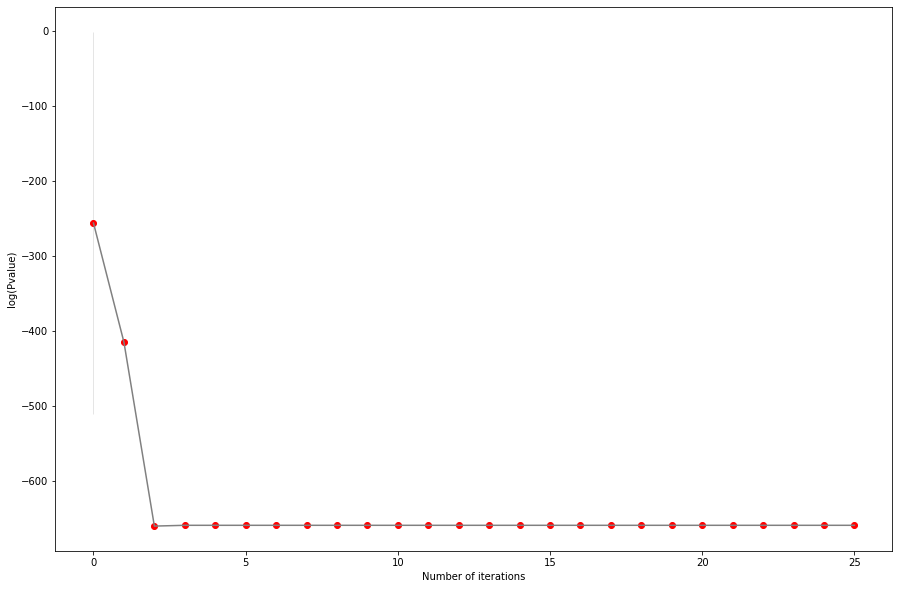

In [73]:
print(arrDist.shape)

arrDistStd = np.std(arrDist, axis = 0)
arrDistMean = np.mean(arrDist, axis = 0)
arrDistInfoStd = np.std(arrDistInfo, axis = 0)
arrDistInfoMean = np.mean(arrDistInfo, axis = 0)
arrDistPStd = np.std(arrPval[:25,:], axis = 0)
arrDistPMean = np.mean(arrPval[:25,:], axis = 0)

"""
plt.subplot(3, 1, 1)
plt.plot(range(26), arrDistMean, 'or')
plt.plot(range(26), arrDistMean, '-', color='gray')
plt.fill_between(range(26), arrDistMean - arrDistStd, arrDistMean + arrDistStd, color='gray', alpha=0.2)

plt.subplot(3, 1, 2)
plt.plot(range(26), arrDistInfoMean, 'or')
plt.plot(range(26), arrDistInfoMean, '-', color='gray')
plt.fill_between(range(26), arrDistInfoMean - arrDistInfoStd, arrDistInfoMean + arrDistInfoStd, color='gray', alpha=0.2)

plt.subplot(3, 1, 3)
plt.plot(range(26), arrDistPMean, 'or')
plt.plot(range(26), arrDistPMean, '-', color='gray')
plt.fill_between(range(26), arrDistPMean - arrDistPStd, arrDistPMean + arrDistPStd, color='gray', alpha=0.2)
"""

plt.figure(figsize=(15,10))
#plt.subplot(3, 1, 1)
"""
plt.plot(range(26), arrDistMean, 'or')
plt.plot(range(26), arrDistMean, '-', color='gray')
plt.fill_between(range(26), arrDistMean - 0.5*arrDistStd, arrDistMean + 0.5*arrDistStd, color='gray', alpha=0.2)
plt.xlabel("Number of iterations")
plt.ylabel("Distance to Barycenters")
plt.savefig('bbcsportdist.png', dpi=1200)
"""
"""
#plt.subplot(3, 1, 2)
plt.plot(range(26), arrDistInfoMean, 'or')
plt.plot(range(26), arrDistInfoMean, '-', color='gray')
plt.fill_between(range(26), arrDistInfoMean - 0.45*arrDistInfoStd, arrDistInfoMean + 0.45*arrDistInfoStd, color='gray', alpha=0.2)
plt.ylabel("Variation of information")
plt.xlabel("Number of iterations")
plt.savefig('bbcsportdistInfo.png', dpi=1200)
"""

#plt.subplot(3, 1, 3)
plt.plot(range(26), np.log(arrDistPMean), 'or')
plt.plot(range(26), np.log(arrDistPMean), '-', color='gray')
plt.fill_between(range(26), np.log(arrDistPMean) - np.log(arrDistPStd), np.log(arrDistPMean) + np.log(arrDistPStd), color='gray', alpha=0.2)
plt.xlabel("Number of iterations")
plt.ylabel("log(Pvalue)")
plt.savefig('bbcsportdistP.png', dpi=1200)


In [72]:
(arrDistPStd)

array([3.10553416e-111, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

In [36]:
arrDistInfoStd

array([0.21636239, 0.2       , 0.1827788 , 0.18829739, 0.18722145,
       0.18847115, 0.18845   , 0.18769085, 0.18718339, 0.1867893 ,
       0.18643238, 0.1862305 , 0.1862305 , 0.1862305 , 0.1862305 ,
       0.1862305 , 0.1862305 , 0.1862305 , 0.1862305 , 0.1862305 ,
       0.1862305 , 0.1862305 , 0.1862305 , 0.1862305 , 0.1862305 ,
       0.1862305 ])

In [28]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from data import loader, load_preprocessing
from knn_classifier import knn

import distances
import hott
from kcluster import kclustering
import numpy as np
import kcluster
import importlib
importlib.reload(kcluster)# Download datasets used by Kusner et al from
# https://www.dropbox.com/sh/nf532hddgdt68ix/AABGLUiPRyXv6UL2YAcHmAFqa?dl=0
# and put them into
data_path = './data/'

# Download GloVe 6B tokens, 300d word embeddings from
# https://nlp.stanford.edu/projects/glove/
# and put them into
embeddings_path = './data/glove.6B/glove.6B.300d.txt'

# Pick a dataset (uncomment the line you want)
data_name = 'bbcsport-emd_tr_te_splitdict5.pkl'
data_matrix = 'bbcsport-emd_tr_te_split.mat'


k_Lda = 5
p = 1
print("Processing LDA")
data_lda = load_preprocessing(data_path + data_name)
print("LDA Done")
C_lda = data_lda['cost_T']
Data_lda = data_lda['proportions']
y_lda = data_lda['y']

dataDist, datalabels, barycenters, dataHist, listPvalue, listInfoDist = kcluster.kclustering(5, Data_lda, C_lda, y_lda, max_iter = 15, reg = 0.01, pVal = False, verbose = False)


print("DistInfo :", listInfoDist)
print("Dist P-Value:", listPvalue)
print("labels", datalabels)

Processing LDA
LDA Done
Loop n° : 0
Loop n° : 1
Distance to Barycenters
840.7947633674742
p-value
Loop n° : 2
Distance to Barycenters
814.4304046295367
p-value
Loop n° : 3
Distance to Barycenters
814.2417084069839
p-value
Loop n° : 4
Distance to Barycenters
814.1765523263273
p-value
Loop n° : 5
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 6
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 7
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 8
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 9
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 10
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 11
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 12
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 13
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 14
Distance to Barycenters
814.1927890403585
p-value
Loop n° : 15
Distance to Barycenters
814.1927890403585
p-value
DistInfo : [1.70049026219457

KeyboardInterrupt: 

In [ ]:
labels, distInfoFinal, distPvalue = kcluster.kclusterLDA(5,Data_lda,y_lda)
print("DistInfo :", distInfoFinal)
print("Dist P-Value:", distPvalue)
print("labels", labels)